# TORONTO Major Crime Incident Analysis

## Course: INF 2207 - Responsible AI
### Saad Umar - 1009728813
### Dann Sioson - 1001346377
### Anthony Huang - 1005681497
### Ang Zhao - 1010171216

In [1]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [50]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from statsmodels.tsa.arima.model import ARIMA
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB

In [94]:
df = pd.read_csv('/drive/MyDrive/INF 2207/mci_with_reworked_descriptions.csv')
df.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,x,y,LOCATION_TYPE_REWORK,UCR_CODE_DESCRIPTION,UCR_CODE_CATEGORY,OFFENCE_REWORK,REPORT_MONTH_NUM,OCC_MONTH_NUM,REPORT_DOW_NUM,OCC_DOW_NUM
0,1.0,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,-8.844976e+06,5.415712e+06,"Apartment (Rooming House, Condo)",Assault Level 1,Assaults,Assault and Bodily Harm,1,1.0,3,3.0
1,2.0,GO-20141260079,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,1,...,-8.832276e+06,5.413747e+06,Other Commercial / Corporate Places (For Profi...,Break and Enter,Property Crimes,Break and Enter,1,12.0,3,2.0
2,3.0,GO-20141260912,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,6,...,-8.838988e+06,5.411068e+06,"Streets, Roads, Highways (Bicycle Path, Privat...",Robbery,Other Violations Involving Violence or The Thr...,Robbery,1,1.0,3,3.0
3,4.0,GO-20141260322,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,7,...,-8.855932e+06,5.410172e+06,"Single Home, House (Attach Garage, Cottage, Mo...",Break and Enter,Property Crimes,Break and Enter,1,12.0,3,2.0
4,5.0,GO-20141260521,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,-8.840192e+06,5.411580e+06,Bar / Restaurant,Break and Enter,Property Crimes,Break and Enter,1,1.0,3,3.0


In total: 396735 rows & 39 columns

In [57]:
# Filter the DataFrame since we are only working with crimes that happened after 2017
df_filter = df[df['OCC_YEAR'] > 2017]
df_filter.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,x,y,LOCATION_TYPE_REWORK,UCR_CODE_DESCRIPTION,UCR_CODE_CATEGORY,OFFENCE_REWORK,REPORT_MONTH_NUM,OCC_MONTH_NUM,REPORT_DOW_NUM,OCC_DOW_NUM
134018,134019.0,GO-20182943,1/1/2018 5:00:00 AM,1/1/2018 5:00:00 AM,2018,January,1,1,Monday,13,...,-8.854302e+06,5.410036e+06,Other Commercial / Corporate Places (For Profi...,Break and Enter,Property Crimes,Break and Enter,1,1.0,1,1.0
134019,134020.0,GO-20183291,1/1/2018 5:00:00 AM,1/1/2018 5:00:00 AM,2018,January,1,1,Monday,14,...,-8.833542e+06,5.413292e+06,"Single Home, House (Attach Garage, Cottage, Mo...",Break and Enter,Property Crimes,Break and Enter,1,1.0,1,1.0
134021,134022.0,GO-20183024,1/1/2018 5:00:00 AM,1/1/2018 5:00:00 AM,2018,January,1,1,Monday,13,...,-8.835400e+06,5.411205e+06,Convenience Stores,Break and Enter,Property Crimes,Break and Enter,1,1.0,1,1.0
134025,134026.0,GO-20184878,1/1/2018 5:00:00 AM,1/1/2018 5:00:00 AM,2018,January,1,1,Monday,21,...,-8.840988e+06,5.417162e+06,"Apartment (Rooming House, Condo)",Assault Level 1,Assaults,Assault and Bodily Harm,1,1.0,1,1.0
134026,134027.0,GO-20183609,1/1/2018 5:00:00 AM,1/1/2018 5:00:00 AM,2018,January,1,1,Monday,15,...,-8.839807e+06,5.415170e+06,"Streets, Roads, Highways (Bicycle Path, Privat...",Theft over $5000,Property Crimes,Theft,1,1.0,1,1.0


Filtered dataframe has: 260492 rows & 39 columns

## **Exploratory Analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396735 entries, 0 to 396734
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   OBJECTID              396735 non-null  float64
 1   EVENT_UNIQUE_ID       396735 non-null  object 
 2   REPORT_DATE           396735 non-null  object 
 3   OCC_DATE              396735 non-null  object 
 4   REPORT_YEAR           396735 non-null  int64  
 5   REPORT_MONTH          396735 non-null  object 
 6   REPORT_DAY            396735 non-null  int64  
 7   REPORT_DOY            396735 non-null  int64  
 8   REPORT_DOW            396735 non-null  object 
 9   REPORT_HOUR           396735 non-null  int64  
 10  OCC_YEAR              396605 non-null  float64
 11  OCC_MONTH             396605 non-null  object 
 12  OCC_DAY               396605 non-null  float64
 13  OCC_DOY               396605 non-null  float64
 14  OCC_DOW               396605 non-null  object 
 15  

In [58]:
df_filter.duplicated().sum()

0

In [57]:
df_filter['OFFENCE_REWORK'].value_counts()

,count
OFFENCE_REWORK,
Assault and Bodily Harm,130891
Theft,58645
Break and Enter,46091
Robbery,20362
Firearms,3954
Miscellaneaous,549


In [56]:
df_filter['MCI_CATEGORY'].value_counts()

,count
MCI_CATEGORY,
Assault,135394
Auto Theft,49679
Break and Enter,46091
Robbery,20362
Theft Over,8966


In [63]:
# Number of crimes in calendar years
df_filter['OCC_YEAR'].value_counts().sort_values(ascending=False)

,count
OCC_YEAR,
2023.0,48645
2022.0,41529
2019.0,40135
2018.0,37561
2020.0,35245
2021.0,34853
2024.0,22524


### **Crime Distribution**

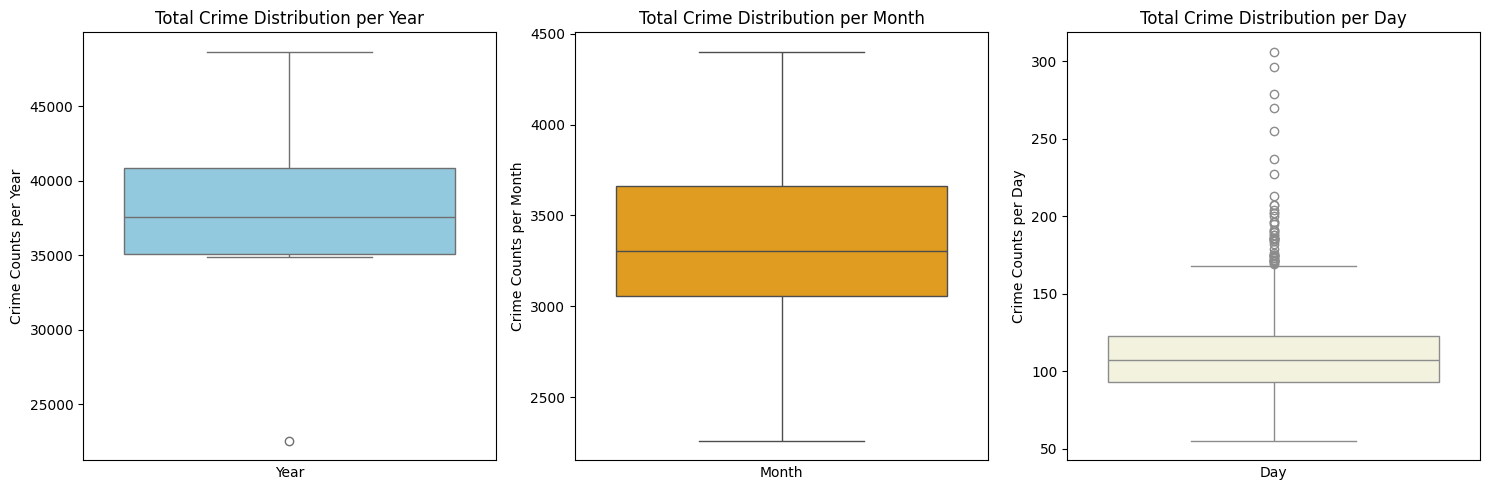

In [72]:
# Group by Occurrence year
groupBy_year = df_filter.groupby('OCC_YEAR').size().reset_index(name='Total')

# Group by Occurrence month and year
by_month = df_filter.groupby(['OCC_MONTH', 'OCC_YEAR']).size().reset_index(name='Total')

# Group by Occurence year and day of year
by_day = df_filter.groupby(['OCC_YEAR', 'OCC_DOY']).size().reset_index(name='Total')

# Arrange subplots in a horizontal row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot total crimes per year
# Using 0 as a constant x-value
sns.boxplot(x=0, y="Total", data=groupBy_year, color="skyblue", ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Crime Counts per Year")
axes[0].set_title("Total Crime Distribution per Year")
axes[0].set_xticks([])  # Hide x-ticks

# Plot total crimes per month
sns.boxplot(x=0, y="Total", data=by_month, color="orange", ax=axes[1])
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Crime Counts per Month")
axes[1].set_title("Total Crime Distribution per Month")
axes[1].set_xticks([])  # Hide x-ticks

# Plot total crimes per day
sns.boxplot(x=0, y="Total", data=by_day, color="beige", ax=axes[2])
axes[2].set_xlabel("Day")
axes[2].set_ylabel("Crime Counts per Day")
axes[2].set_title("Total Crime Distribution per Day")
axes[2].set_xticks([])

plt.tight_layout()
plt.show()


In [65]:
# Calculate mean and median for each group
mean_groupBy_year= groupBy_year['Total'].mean()
median_groupBy_year = groupBy_year['Total'].median()
mean_by_month = by_month['Total'].mean()
median_by_month = by_month['Total'].median()
mean_by_day = by_day['Total'].mean()
median_by_day = by_day['Total'].median()

# Print the calculated mean and median values rounded to 2 decimal places
print("Total Crimes per Year:")
print(f"Mean: {mean_groupBy_year:.2f}, Median: {median_groupBy_year}\n")

print("Total Crimes per Month:")
print(f"Mean: {mean_by_month:.2f}, Median: {median_by_month}\n")

print("Total Crimes per Day:")
print(f"Mean: {mean_by_day:.2f}, Median: {median_by_day}\n")

Total Crimes per Year:
Mean: 37213.14, Median: 37561.0

Total Crimes per Month:
Mean: 3339.64, Median: 3304.0

Total Crimes per Day:
Mean: 109.77, Median: 107.0



In [66]:
# Change data type
groupBy_year['OCC_YEAR'] = groupBy_year['OCC_YEAR'].astype(int)

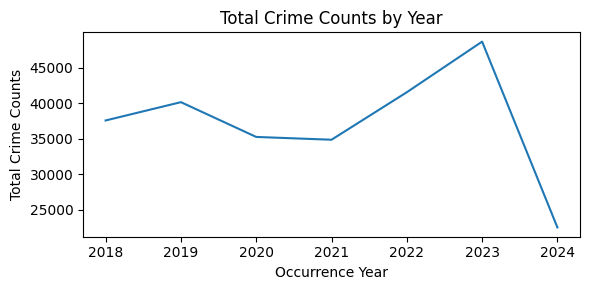

In [73]:
# Create a line plot
plt.figure(figsize=(6, 3))
sns.lineplot(x='OCC_YEAR', y='Total', data=groupBy_year)

# Set the title and labels
plt.title('Total Crime Counts by Year')
plt.xlabel('Occurrence Year')
plt.ylabel('Total Crime Counts')

plt.tight_layout()
plt.show()

The above plot shows the trend of the total number of crimes committed since 2018. There was a slight decrease in crimes from 2019 to 2021 in comparison to 2018. However, there has been a significant increase from 2021 to 2023. Additionally, the reason that 2024 has a low count is because this dataset only contains 6 months of data for 2024.

In [107]:
df_filter['OCC_DAY'] = df_filter['OCC_DAY'].astype(int)

<ipython-input-107-fd02bbd6a54d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['OCC_DAY'] = df_filter['OCC_DAY'].astype(int)


#### Understand crime trends by month, day, hour and day of the week:

<ipython-input-74-82a89308dfc5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filter, x='OCC_MONTH', ax=axs[0, 0], palette='Set2')
<ipython-input-74-82a89308dfc5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(range(1, 13))
<ipython-input-74-82a89308dfc5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filter, x='OCC_DAY', ax=axs[0, 1], palette='Set2')
<ipython-input-74-82a89308dfc5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filter, x='OCC_H

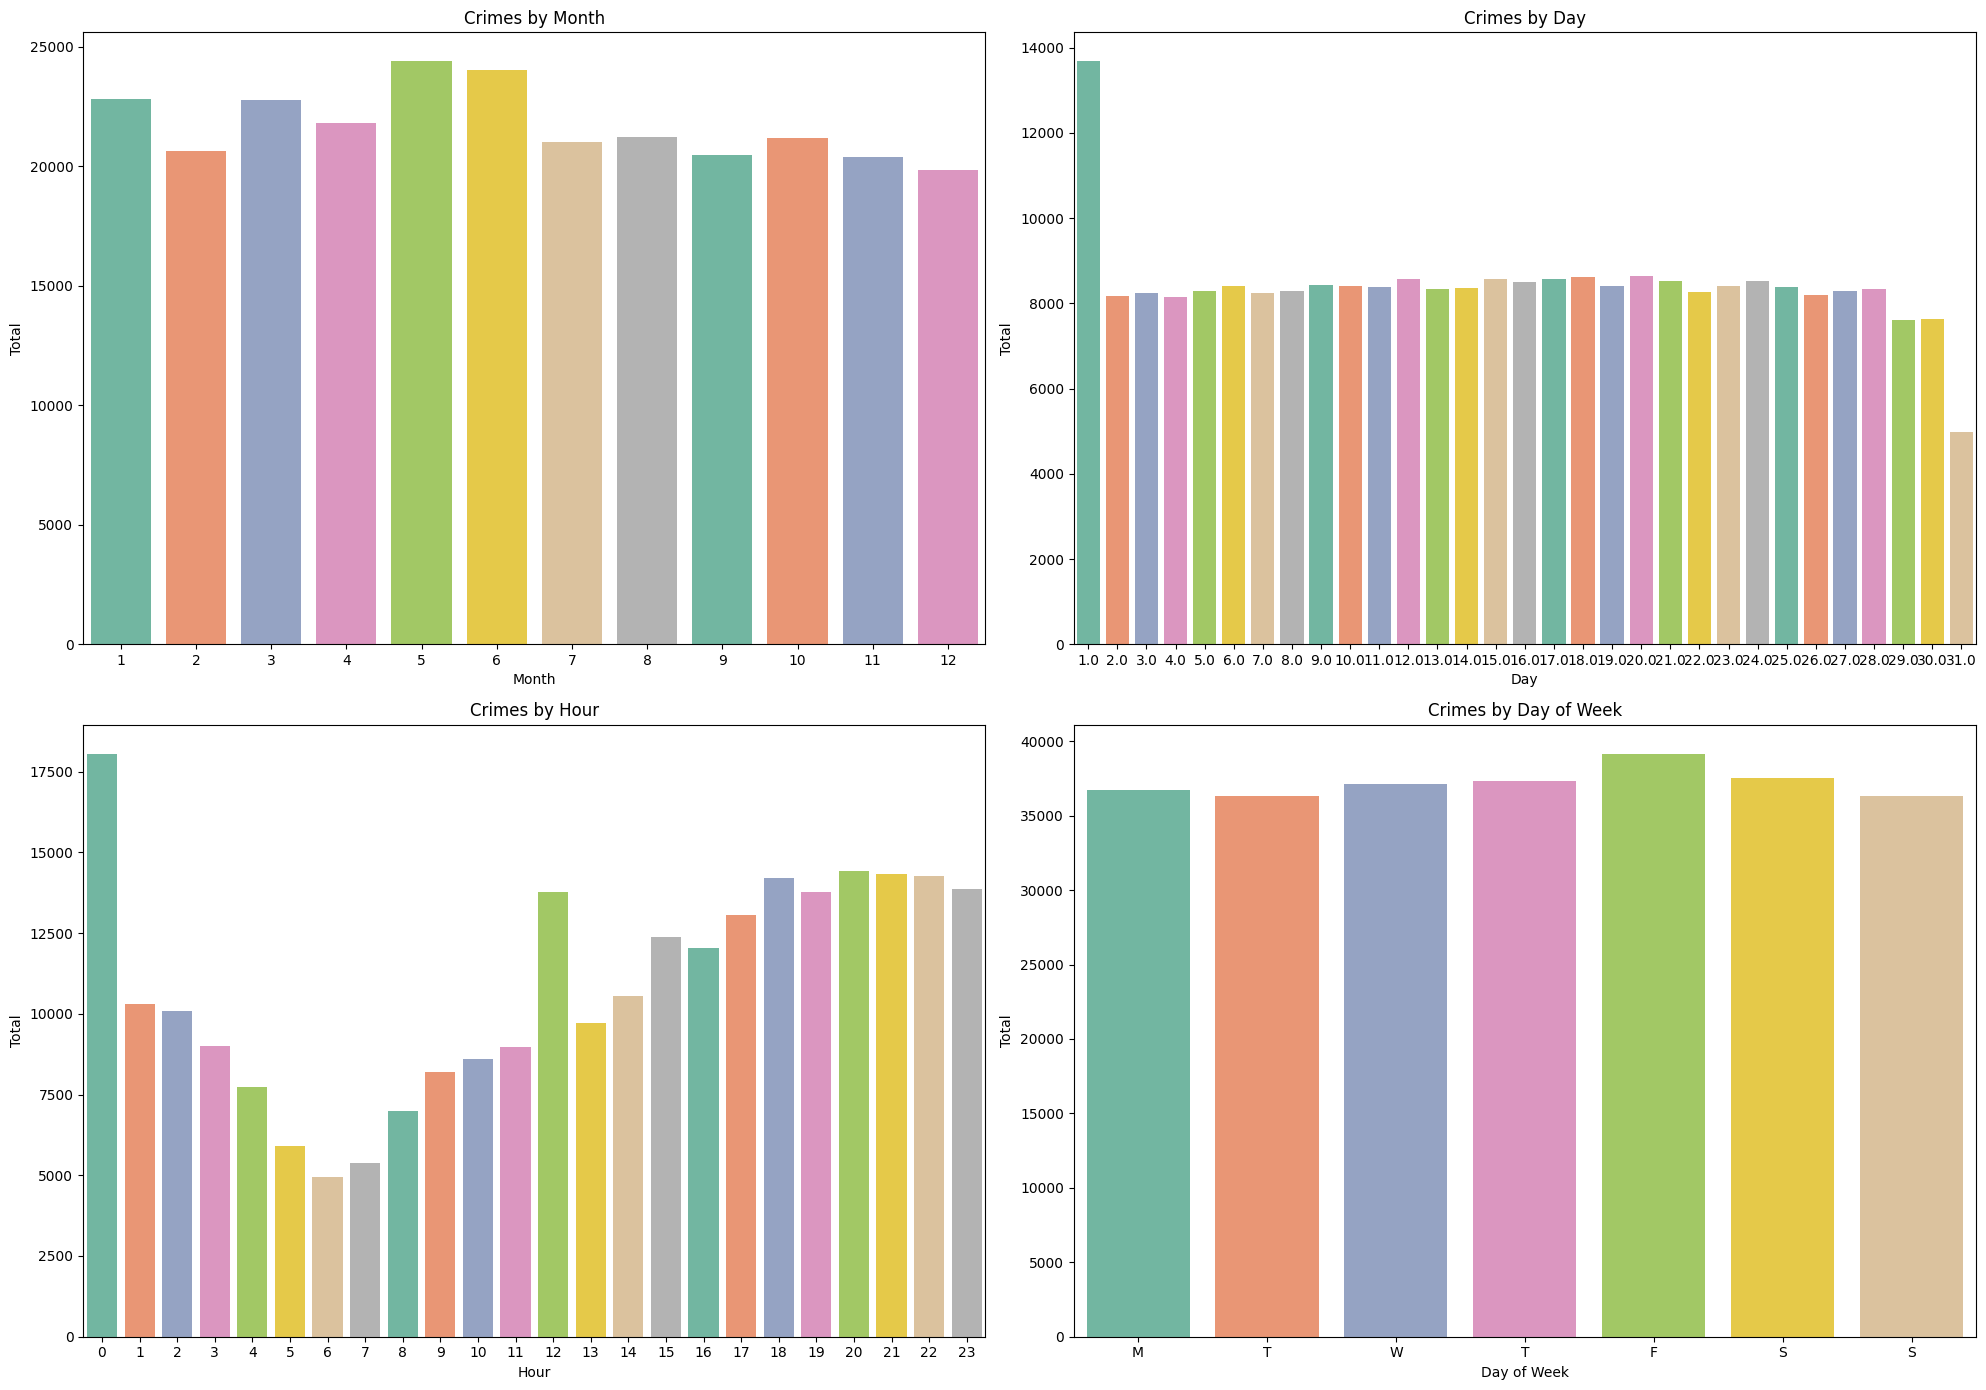

In [74]:
# figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot Crime by Month
sns.countplot(data=df_filter, x='OCC_MONTH', ax=axs[0, 0], palette='Set2')
axs[0, 0].set_title("Crimes by Month")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Total")
axs[0, 0].set_xticklabels(range(1, 13))
axs[0, 0].legend().remove()

# Plot Crime by Day
sns.countplot(data=df_filter, x='OCC_DAY', ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title("Crimes by Day")
axs[0, 1].set_xlabel("Day")
axs[0, 1].set_ylabel("Total")
axs[0, 1].legend().remove()

# Plot Crime by Hour
sns.countplot(data=df_filter, x='OCC_HOUR', ax=axs[1, 0], palette='Set2')
axs[1, 0].set_title("Crimes by Hour")
axs[1, 0].set_xlabel("Hour")
axs[1, 0].set_ylabel("Total")
axs[1, 0].legend().remove()

# Plot Crime by Day of Week
sns.countplot(data=df_filter, x='OCC_DOW', ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title("Crimes by Day of Week")
axs[1, 1].set_xlabel("Day of Week")
axs[1, 1].set_ylabel("Total")
axs[1, 1].set_xticklabels(['M', 'T', 'W', 'T', 'F', 'S', 'S'])  # Set x-tick labels
axs[1, 1].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-75-8476449c0a9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='MCI_CATEGORY', data=mci, palette='deep')


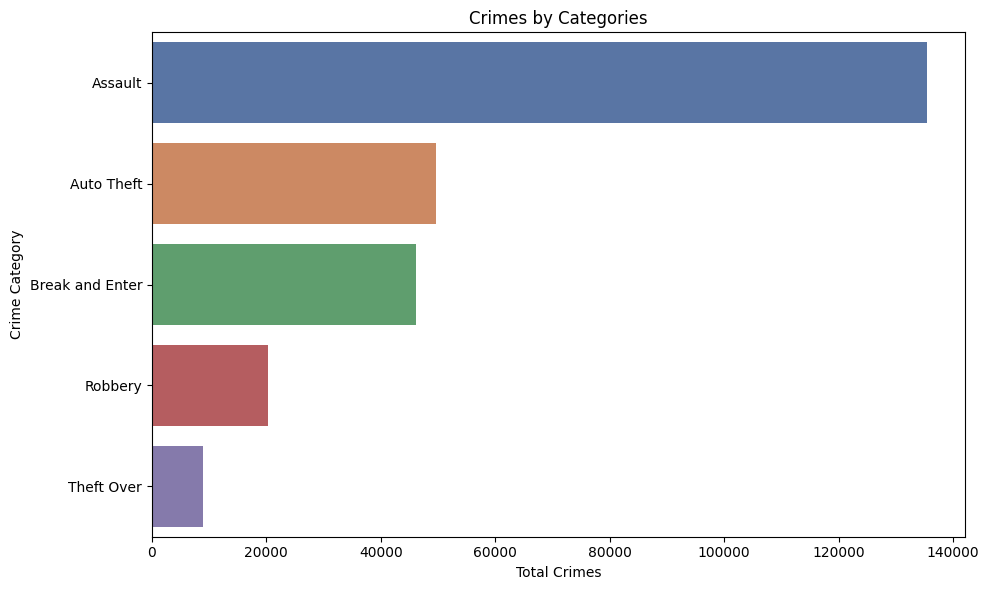

In [75]:
# Group by 'MCI' and count occurrences
mci = df_filter.groupby('MCI_CATEGORY').size().reset_index(name='Total')

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='MCI_CATEGORY', data=mci, palette='deep')

plt.title("Crimes by Categories")
plt.xlabel("Total Crimes")
plt.ylabel("Crime Category")

# Hide the legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

MCI Trends by year:

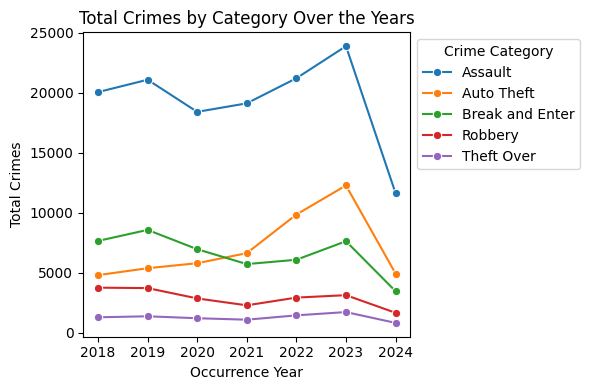

In [86]:
# Group by 'MCI' and 'occurrenceyear' and count occurrences
mciyear = df_filter.groupby(['MCI_CATEGORY', 'OCC_YEAR']).size().reset_index(name='Total')

# Create a line plot
plt.figure(figsize=(6, 4))  # Set the figure size
sns.lineplot(data=mciyear, x='OCC_YEAR', y='Total', hue='MCI_CATEGORY', marker='o')

# Set the title and labels
plt.title("Total Crimes by Category Over the Years")
plt.xlabel("Occurrence Year")
plt.ylabel("Total Crimes")

# Show the plot
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

<ipython-input-76-d8d0b37a14ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PREMISES_TYPE', data=df_filter, palette='deep', width=0.8)


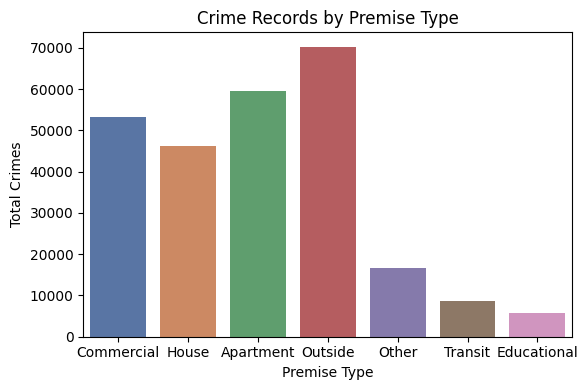

In [76]:
# Create a bar plot for crime records by premise type
plt.figure(figsize=(6, 4))
sns.countplot(x='PREMISES_TYPE', data=df_filter, palette='deep', width=0.8)

plt.title("Crime Records by Premise Type")
plt.xlabel("Premise Type")
plt.ylabel("Total Crimes")

# Remove the legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

Top 10 Neighbourhoods by Crime Categories

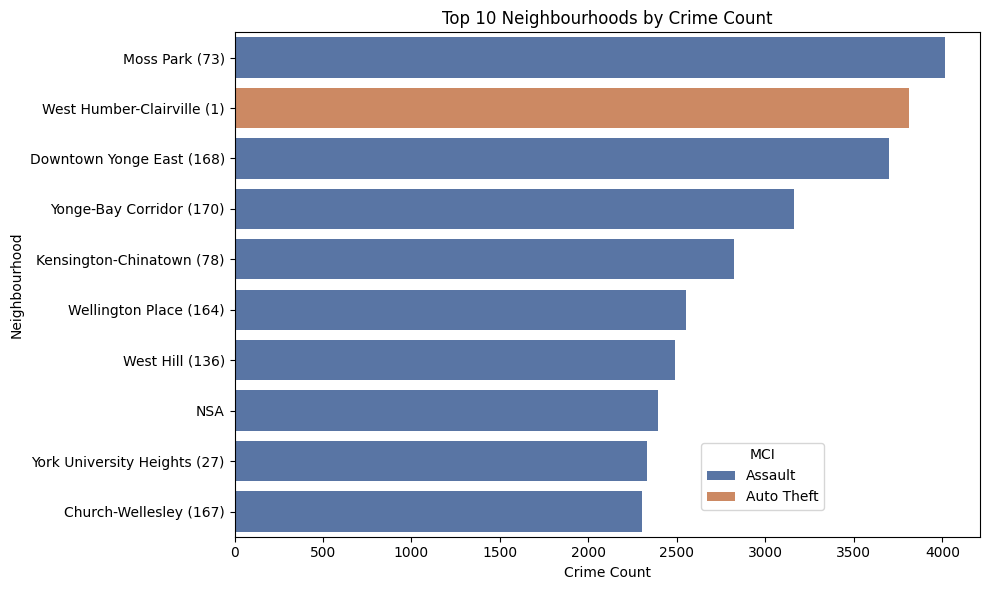

In [77]:
# Group by MCI and Neighbourhood
dfmci = df_filter.groupby(['MCI_CATEGORY', 'NEIGHBOURHOOD_158']).size().reset_index(name='Total')
dfmci = dfmci.nlargest(10, 'Total').sort_values(by='Total', ascending=False)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=dfmci, x='Total', y='NEIGHBOURHOOD_158', hue='MCI_CATEGORY', palette='deep')

plt.xlabel("Crime Count")
plt.ylabel("Neighbourhood")
plt.title("Top 10 Neighbourhoods by Crime Count")
plt.legend(title='MCI', loc='upper right', bbox_to_anchor=(0.8, 0.2))

plt.tight_layout()
plt.show()


## Feature Selection

In [78]:
# np.random.seed can be set for reproducibility
np.random.seed(42)

# Splitting the dataset into training (70%) and test (30%)
featureselect, fstest = train_test_split(df_new, test_size=0.3, random_state=42)

# Separating the target variable and features
X_select = featureselect.drop(columns=['MCI_CATEGORY'])
y_select = featureselect['MCI_CATEGORY']

# Convert categorical features to numeric using LabelEncoder for the training dataset
X_select_encoded = X_select.copy()
for column in X_select_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_select_encoded[column] = le.fit_transform(X_select_encoded[column])

# Calculating mutual information for the training dataset
mi_scores = mutual_info_classif(X_select_encoded, y_select, random_state=456)
mi_scores = pd.Series(mi_scores, index=X_select_encoded.columns)

print("Mutual Information Scores:")
print(mi_scores)

# Select the top 5 features based on mutual information
top_features = mi_scores.nlargest(5).index.tolist()
print("Top Features are:", top_features)

# Drop unnecessary variables, load the second dataset
np.random.seed(123)
featureselect2, fstest2 = train_test_split(df_new, test_size=0.3, random_state=123)

# Separating target variable and features for the second dataset
X_select2 = featureselect2.drop(columns=['MCI_CATEGORY'])
y_select2 = featureselect2['MCI_CATEGORY']

# Convert categorical features to numeric using LabelEncoder for the second dataset
X_select2_encoded = X_select2.copy()
for column in X_select2_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_select2_encoded[column] = le.fit_transform(X_select2_encoded[column])

# Calculating mutual information for the second dataset
mi_scores2 = mutual_info_classif(X_select2_encoded, y_select2, random_state=123)
mi_scores2 = pd.Series(mi_scores2, index=X_select2_encoded.columns)

print("Mutual Information Scores for Second Dataset:")
print(mi_scores2)

# Select the top 5 features based on mutual information from the second dataset
top_features2 = mi_scores2.nlargest(5).index.tolist()
print("Top Features for Second Dataset:", top_features2)

# Running on the 30% partitioned dataset to see how the information gain filter works
X_fstest2 = fstest2.drop(columns=['MCI_CATEGORY'])
y_fstest2 = fstest2['MCI_CATEGORY']

# Convert categorical features to numeric using LabelEncoder for the test dataset
X_fstest2_encoded = X_fstest2.copy()
for column in X_fstest2_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_fstest2_encoded[column] = le.fit_transform(X_fstest2_encoded[column])

# Mutual information on the test dataset
mi_scores3 = mutual_info_classif(X_fstest2_encoded, y_fstest2, random_state=123)
mi_scores3 = pd.Series(mi_scores3, index=X_fstest2_encoded.columns)

# Print mutual information scores for the test dataset
print("Mutual Information Scores for Test Dataset:")
print(mi_scores3)

# Select the top 5 features based on mutual information for the test dataset
top_features3 = mi_scores3.nlargest(5).index.tolist()
print("Top Features for Test Dataset:", top_features3)

Mutual Information Scores:
OCC_HOUR                0.034429
DIVISION                0.041512
PREMISES_TYPE           0.184129
NEIGHBOURHOOD_158       0.064508
HOOD_140                0.064388
x                       0.192096
y                       0.192790
LOCATION_TYPE_REWORK    0.264472
OFFENCE_REWORK          1.184609
dtype: float64
Top Features are: ['OFFENCE_REWORK', 'LOCATION_TYPE_REWORK', 'y', 'x', 'PREMISES_TYPE']
Mutual Information Scores for Second Dataset:
OCC_HOUR                0.030647
DIVISION                0.040910
PREMISES_TYPE           0.184126
NEIGHBOURHOOD_158       0.065647
HOOD_140                0.063780
x                       0.191377
y                       0.190688
LOCATION_TYPE_REWORK    0.266623
OFFENCE_REWORK          1.186797
dtype: float64
Top Features for Second Dataset: ['OFFENCE_REWORK', 'LOCATION_TYPE_REWORK', 'x', 'y', 'PREMISES_TYPE']
Mutual Information Scores for Test Dataset:
OCC_HOUR                0.030546
DIVISION                0.042555
PR

In [32]:
df_new.dtypes

,0
OCC_HOUR,int64
DIVISION,object
PREMISES_TYPE,object
MCI_CATEGORY,object
NEIGHBOURHOOD_158,object
HOOD_140,object
x,float64
y,float64
LOCATION_TYPE_REWORK,object
OFFENCE_REWORK,object


In [79]:
df_new = df_filter.drop(['OBJECTID', 'EVENT_UNIQUE_ID','OCC_DATE', 'REPORT_DATE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY','REPORT_DOY',
                         'REPORT_DOW', 'REPORT_HOUR','OFFENCE','UCR_CODE_DESCRIPTION','UCR_CODE_CATEGORY','REPORT_MONTH_NUM', 'LONG_WGS84', 'LAT_WGS84', 'LOCATION_TYPE',
                         'OCC_YEAR','OCC_MONTH','OCC_DAY','OCC_DOY','OCC_DOW','OCC_DOW_NUM','REPORT_DOW_NUM','OCC_MONTH_NUM', 'HOOD_158','NEIGHBOURHOOD_140'], axis=1)

### Class Imbalance - Apply SMOTE
The training dataset has class imbalances within the MCI category. The data is heavily skewed to the ‘Assault’ class

In [81]:
# Convert categorical columns to numeric using LabelEncoder
X_train_encoded = X_train.copy()
for column in X_train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_encoded[column] = le.fit_transform(X_train_encoded[column])

# Check if all columns are numeric now
print(X_train_encoded.dtypes)

# Applying SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Converting back to DataFrame
df_conv = pd.DataFrame(X_train_smote, columns=X_train_encoded.columns)
df_conv['MCI_CATEGORY'] = y_train_smote

# Checking the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(df_conv['MCI_CATEGORY']))

# Checking the class distribution in the original dataset
print("\nOriginal class distribution:")
print(Counter(y_train))

# Getting the proportion of classes after SMOTE
class_proportion = df_conv['MCI_CATEGORY'].value_counts(normalize=True)
print("\nProportion of classes after SMOTE:")
print(class_proportion)

OCC_HOUR                  int64
DIVISION                  int64
PREMISES_TYPE             int64
NEIGHBOURHOOD_158         int64
HOOD_140                  int64
x                       float64
y                       float64
LOCATION_TYPE_REWORK      int64
OFFENCE_REWORK            int64
dtype: object

Class distribution after SMOTE:
Counter({0: 94652, 1: 94652, 2: 94652, 3: 94652, 4: 94652})

Original class distribution:
Counter({0: 94652, 1: 34806, 2: 32200, 3: 14357, 4: 6329})

Proportion of classes after SMOTE:
MCI_CATEGORY
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64


In [41]:
# Splitting the dataset into 70% train and 30% test
trainset_model, testset_model = train_test_split(df_new, test_size=0.3, random_state=234)

# Separate features and target variable
X_train = trainset_model.drop(columns=['MCI_CATEGORY'])
y_train = trainset_model['MCI_CATEGORY']
X_test = testset_model.drop(columns=['MCI_CATEGORY'])
y_test = testset_model['MCI_CATEGORY']

In [46]:
# Encoding categorical variables in features
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column].astype(str))  # Ensure string type
    X_test[column] = le.transform(X_test[column].astype(str))  # Ensure string type
    label_encoders[column] = le

# Encoding the target variable if it's categorical
if y_train.dtype == 'object':
    le_target = LabelEncoder()
    y_train = le_target.fit_transform(y_train.astype(str))
    y_test = le_target.transform(y_test.astype(str))

### Predictive Modelling

### Decision Tree:

In [84]:
# Apply SMOTE to balance the classes
#smote = SMOTE(sampling_strategy='auto', random_state=234)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking class distribution after SMOTE
# print("Class distribution after SMOTE:", np.bincount(y_train_smote))

# Train Decision Tree Classifier (similar to J48 in R)
clf = DecisionTreeClassifier(random_state=243, min_samples_leaf=100)
clf.fit(X_train_smote, y_train_smote)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation on the training set
cv_scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=5)
print("\n5-fold Cross Validation Scores:", cv_scores)
print("\nAverage CV Score: {:.2f}".format(np.mean(cv_scores)))

Confusion Matrix:
 [[40742     0     0     0     0]
 [    0 12960     0     0  1913]
 [    0     0 13891     0     0]
 [    0     0     0  6005     0]
 [    0  1056     0     0  1581]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40742
           1       0.92      0.87      0.90     14873
           2       1.00      1.00      1.00     13891
           3       1.00      1.00      1.00      6005
           4       0.45      0.60      0.52      2637

    accuracy                           0.96     78148
   macro avg       0.88      0.89      0.88     78148
weighted avg       0.97      0.96      0.96     78148


5-fold Cross Validation Scores: [0.92851709 0.93888138 0.92414318 0.92265351 0.9231712 ]

Average CV Score: 0.93


In [90]:
df_new['MCI_CATEGORY'].value_counts()

,count
MCI_CATEGORY,
Assault,135394
Auto Theft,49679
Break and Enter,46091
Robbery,20362
Theft Over,8966


**Random Forest Classifier**

In [91]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Evaluate the classifier using 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("\nCross-validation scores (5-fold):", cv_scores)
print("\nAverage CV Score: {:.2f}".format(cv_scores.mean()))

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred, target_names=['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over'])
print("\nClassification Report:\n", class_report)


Cross-validation scores (5-fold): [0.97115358 0.97151005 0.97107132 0.97126326 0.97255128]

Average CV Score: 0.9715098990993877

Confusion Matrix:
 [[40742     0     0     0     0]
 [    0 14201     0     0   672]
 [    0     0 13891     0     0]
 [    0     0     0  6005     0]
 [    0  1515     0     0  1122]]

Classification Report:
                  precision    recall  f1-score   support

        Assault       1.00      1.00      1.00     40742
     Auto Theft       0.90      0.95      0.93     14873
Break and Enter       1.00      1.00      1.00     13891
        Robbery       1.00      1.00      1.00      6005
     Theft Over       0.63      0.43      0.51      2637

       accuracy                           0.97     78148
      macro avg       0.91      0.88      0.89     78148
   weighted avg       0.97      0.97      0.97     78148



<ipython-input-36-8618a799754b>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=crime_series.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='red')


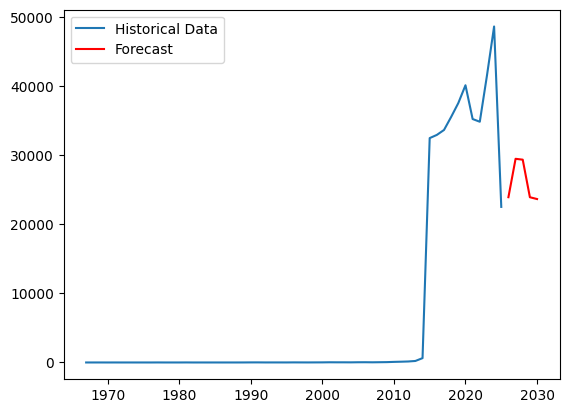

In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset
# Ensure the 'OCC_DATE' column is in datetime format
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

# Set the 'OCC_DATE' as the index
df.set_index('OCC_DATE', inplace=True)

# Aggregate the number of crimes per year using resample
crime_series = df.resample('YE').size()

# Fit the ARIMA model
model = ARIMA(crime_series, order=(5, 1, 0))  # Adjust the order based on auto-correlation analysis
model_fit = model.fit()

# Forecast the number of crimes for the next 5 years
forecast = model_fit.forecast(steps=5)

# Plot the results
plt.plot(crime_series, label='Historical Data')
plt.plot(pd.date_range(start=crime_series.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.show()


<ipython-input-95-aae12b1f10a8>:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  crime_series = df.resample('Y').size()
<ipython-input-95-aae12b1f10a8>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=crime_series.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='red')


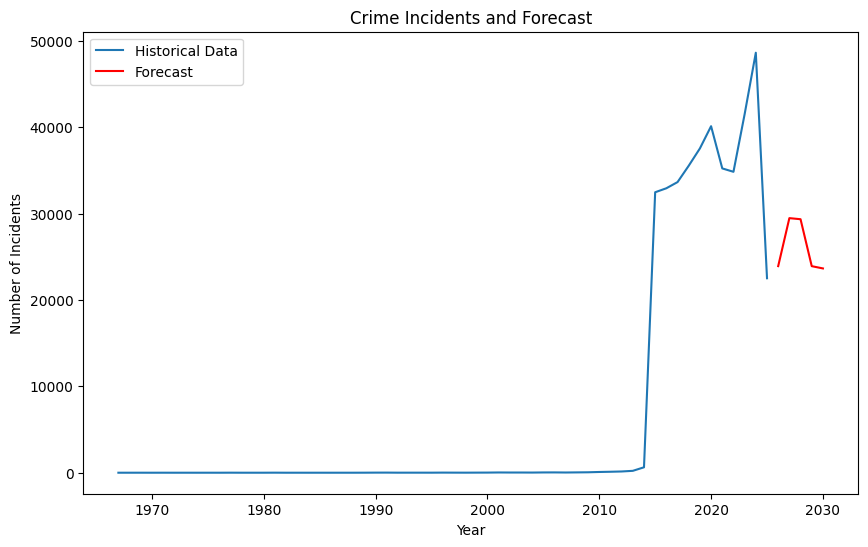

In [95]:
# Ensure 'OCC_DATE' is in datetime format
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

# Set the 'OCC_DATE' as the index
df.set_index('OCC_DATE', inplace=True)

# Aggregate the number of crimes per year
crime_series = df.resample('Y').size()

# Fit the ARIMA model
model = ARIMA(crime_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the number of crimes for the next 5 years
forecast = model_fit.forecast(steps=5)

# Plot the historical data and the forecasted data
plt.figure(figsize=(10,6))
plt.plot(crime_series, label='Historical Data')
plt.plot(pd.date_range(start=crime_series.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecast', color='red')
plt.title('Crime Incidents and Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()
